In [1]:
# Inicialización del entorno
%matplotlib notebook
%matplotlib inline
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import spb as spb
from math import sqrt

# Importar los símbolos de sympy
x,y,z,t = sp.symbols('x y, z, t')

# Secuencia de Fibonacci

$F_n = F_{n-1} + F_{n-2} \ \ \forall n \in \mathbb{Z}(n \geq 2) $

Condiciones iniciales: $F_0 = F_1 = 1$

$1,1,2,3,5,8,13,21,34,55,89,144,\dots$

# Fórmula para la relación de recurrencia de la secuencia de Fibonacci

La sucesión de Fibonacci satisface parte de la hipótesis del teorema de raíces distintas, ya que la relación de Fibonacci es una relación de recurrencia de segundo orden lineal y homogénea con coeficientes constantes $A = 1$ y $B = 1$.

La ecuación característica

$t^2 - t - 1 = 0$ tiene las raíces:

$ \displaystyle{t = \frac{1 \pm \sqrt{1-4(-1)}}{2} = \begin{cases}
\frac{1 + \sqrt{5}}{2}\\
\frac{1 - \sqrt{5}}{2}
\end{cases}} $

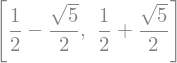

In [2]:
# Ecuación t^2 - t - 1
eq = sp.Eq(t**2-t-1,0)
# Buscar las soluciones para la ecuación
sp.solve(eq, t)

Por tanto, tiene dos raíces distintas. Del teorema de raíces distintas se deduce que:

$\displaystyle{ F_n = C \left( \frac{1+\sqrt{5}}{2} \right)^n + D \left( \frac{1+\sqrt{5}}{2} \right)^n \ \ \forall n \in \mathbb{Z} (n \geq 0)}$

C y D son los números cuyos valores se determinan por el hecho de que $F_0 = F_1 = 1$. Para encontrar C y D:

$\displaystyle{F_0 = 1 = C \left( \frac{1+\sqrt{5}}{2} \right)^0 + D \left( \frac{1+\sqrt{5}}{2} \right)^0 = C + D }$

$\displaystyle{F_1 = 1 = C \left( \frac{1+\sqrt{5}}{2} \right)^1 + D \left( \frac{1+\sqrt{5}}{2} \right)^1 = C\left( \frac{1+\sqrt{5}}{2} \right) + D\left( \frac{1-\sqrt{5}}{2} \right) }$

Lo que nos deja el siguiente sistema de ecuaciones:

$\displaystyle{\begin{cases} C + D = 1 \\ Ca + Db = 1 \end{cases}}$

para $\displaystyle{a = \frac{1+\sqrt{5}}{2}}$ y $\displaystyle{b = \frac{1+\sqrt{5}}{2}}$.

Resolviendo para C y D:

$\displaystyle{C = 1 - D}$

$\displaystyle{(1-D)a + Db = 1}$

$\displaystyle{a - Da - Db = 1}$

$\displaystyle{a - D(a+b) = 1}$

$\displaystyle{D = \frac{a-1}{a-b} = \frac{a-1}{\sqrt{5}} = -\frac{(1-\sqrt{5})}{2 \sqrt{5}}}$

Sustituyendo D en la primera ecuación:

$\displaystyle{C = 1 + \frac{1-\sqrt{5}}{2\sqrt{5}} = \frac{1+\sqrt{5}}{2\sqrt{5}}}$

In [3]:
# Declarar a,b,C,D como símbolos
a,b,C,D = sp.symbols('a,b,C D')
# a y b 
a = (1 + sqrt(5))/2
b = (1 - sqrt(5))/2

# Ecuaciones del sistema
eq1 = sp.Eq(C + D, 1)
eq2 = sp.Eq(C*a + D*b, 1)

# Resolver como un sistema de ecuaciones lineales
sol = list(sp.linsolve([eq1,eq2],(C,D))) # linsolve retorna un CONJUNTO de PARES ORDENADOS (no una lista)

# Para conjuntos FINITOS (FiniteSet), se puede convertir el conjunto a lista con list(FiniteSet)
# Para conjuntos INFINITOS, esto no es posible. Se usarán iteradores cuando proceda.

display(f"Soluciones: C = {sol[0][0]} D = {sol[0][1]}")
display(f"C + D = {sol[0][0]} + {sol[0][1]} = {sol[0][0] + sol[0][1]}")
display(f"Ca + Db = {sol[0][0] * a} + {sol[0][1] * b} = {(sol[0][0]*a) + (sol[0][1] * b)}")

'Soluciones: C = 0.723606797749979 D = 0.276393202250021'

'C + D = 0.723606797749979 + 0.276393202250021 = 1.00000000000000'

'Ca + Db = 1.17082039324994 + -0.170820393249937 = 1.00000000000000'

Cabe destacar que D = - C.

Sustituyendo estos valores para C y D en la fórmula para $F_n$, se obtiene:

$\displaystyle{ F_n = \left( \frac{1+ \sqrt{5}}{2\sqrt{5}} \right)\left( \frac{1+ \sqrt{5}}{2} \right)^n + \left( \frac{-(1- \sqrt{5})}{2\sqrt{5}} \right)\left( \frac{1 - \sqrt{5}}{2} \right)^n }$

Que se simplifica como

$\displaystyle{ F_n = \frac{1}{\sqrt{5}} \left( \left(\frac{1+ \sqrt{5}}{2} \right)^{n+1} - \left( \frac{1- \sqrt{5}}{2} \right)^{n+1} \right) }$

In [4]:
# 1/sqrt(5)
msqrt = 1/sqrt(5)
# Función para calcular el enésimo término de Fibonacci
def fib1(n):
    return msqrt * (a**(n+1) - b**(n+1))

fibs = []
# Calcula 11 terminos y los introduce en una lista
for n in range(0,12):
    fibs.append(int(fib1(n)))
    
# Muestra los términos calculados
display(fibs)

# Número Aureo

El número Aureo es un número irracional representado por la letra griega $\varphi$ (phi) o $\phi$ (Phi mayúscula). Se corresponde con cada una de las raíces de la relación de Fibonacci:

$\displaystyle{\varphi = \frac{1 + \sqrt{5}}{2} \approx 1.618033988749894}$ y $\displaystyle{\phi = \frac{1 - \sqrt{5}}{2} \approx -0.618033988749894}$ 

La fórmula de la sucesión de Fibonacci se simplifica como

$\displaystyle{ F_n = \frac{\varphi^{n+1}}{\sqrt{5}} - \frac{\phi^{n+1}}{\sqrt{5}} }$

# Optimización

La fórmula de recursión obtenida se puede simplificar aún más como

$\displaystyle{ F_n = \lfloor \frac{\varphi^{n+1}}{\sqrt{5} } \rceil }$

usando el hecho de que $-1 < \frac{\phi^{n+1}}{\sqrt{5}} < 1  \ \ \forall n \in \mathbb{Z}(n \geq 0) $

### Prueba de la optimización:

Para probar que la fórmula de la optimización para la secuencia de Fibonacci es verdadera, primero hay que probar las siguientes afirmaciones

### - Teorema 1: Rango de valores para $n = \frac{p}{q}$ donde $p,q \in \mathbb{R}$

Sea $n$ un número real dado por la fórmula $n = \frac{p}{q}$ para dos números reales $p,q$:

- Si $p > q$ entonces $1 < n$.
- Si $p = q$ entonces $n = 1$.
- Si $p < q$ entonces $0 < n < 1$.

Siempre que $p,q \geq 1$.

Para el resto de valores, supongamos que $0 < p < 1$. Entonces $p = \frac{r}{s}$ para dos números reales $r < s$  con $r > 1$ y $s > 1$. Por tanto:

$\displaystyle{n = \frac{p}{q} = \frac{r}{qs}}$

Como $r < s$ y $q \geq 1$, entonces $r < qs$ y, por, tanto $0 < \frac{r}{qs} < 1$.

Por otro lado, si $0 < q < 1$, entonces $q = \frac{r}{s}$ para dos números reales $r < s$ con $r > 1$ y $s > 1$. Por tanto:

$\displaystyle{n = \frac{sp}{r}}$

Como $r < s$, entonces $r < sp$ y por tanto $1 < \frac{sp}{r}$.

______________________________________________________

### - Corolario 1:

Dada una fracción $\frac{p}{q}$, si $0 < p < 1$ y $q \geq 1$ ($q \in \mathbb{R}$), entonces $0 < (\frac{p}{q})^n < 1$ para todo $n \in \mathbb{Z} \geq 1$

** Prueba **: Por el teorema 1, cuando $0 < p < 1$ y $q \geq 1$, tenemos que:

$\displaystyle{0 < \frac{r}{qs} < 1}$

Aplicando la enésima potencia a cada lado de la inigualdad, siendo $n \in \mathbb{Z} \geq 1$:

$\displaystyle{0 < (\frac{r}{qs})^n < 1}$ o, multiplicando previamente por $qs$ a cada lado, $\displaystyle{r^n < (qs)^n}$.

______________________________________________________

### - Corolario 2:

Dada una fracción $\frac{p}{q}$, si $0 < p < 1$ y $q \geq 1$ ($q \in \mathbb{R}$), entonces $(\frac{p}{q})^n \to 0$ cuando $n \to \infty$ y $n \in \mathbb{Z}$

** Prueba **: Por el corolario 1, tenemos que $p = (\frac{r}{qs})^n$ con $r < qs$. Ya que $r < qs$, al incrementar $n$, $r^n < (qs)^n$.
$qs^n$ crece más rápido que $r^n$ y, por tanto, $(\frac{p}{q})^n \to 0$ cuando $n \to \infty$.

______________________________________________________
### - Teorema 2: Si $0 < n=\frac{p}{q} < 1 \ \ $ y $ \ \ 0 < m=\frac{r}{s} < 1 \ \ $ para los números reales $p,q,r,s \geq 1$, entonces $0 < nm < 1$

** Prueba **: Por el teorema 1, ya que $0 < n < 1$ y $0 < m < 1$, entonces $p < q$ y $r < s$. Por tanto, $0 < \frac{pr}{qs} < 1$, y $pr < qs$.
______________________________________________________

### - Teorema 3: Para todo $n \in \mathbb{Z} \geq 0$, $ \ \ -1 < \frac{\phi^{n+1}}{\sqrt{5}} < 1$:

Tenemos que $\phi = \frac{1 - \sqrt{5}}{2}$. El numerador $1 - \sqrt{5} \approx -1.236067977$, por tanto $1 - \sqrt{5} < -1$. Y en el denominador $1 < 2$. Por tanto, el numerador es menor que el denominador. Aplicando el teorema 1 deducimos que $-1 < \frac{1-\sqrt{5}}{2} < 0$. Por el Corolario 1, tenemos:

$\displaystyle{\left( \frac{1-\sqrt{5}}{2} \right)^{n+1} = \left(\frac{1-\sqrt{5}}{2}\right) \left( \frac{1-\sqrt{5}}{2} \right)^n = \phi \cdot \phi^n}$

Usando el Teorema 2, deducimos que

$\displaystyle{-1 < \phi \cdot \phi^n < 1}$

Y por consiguiente

$\displaystyle{-1 < \frac{1}{\sqrt{5}} \cdot (\phi \cdot \phi^n) < 1}$

O lo que es lo mísmo

$\displaystyle{-1 < \frac{\phi^{n+1}}{\sqrt{5}} < 1}$

______________________________________________________

### - Corolario 3: Cuando $n \to \infty$, $\displaystyle{\frac{\phi^{n+1}}{\sqrt{5}} \to 0}$

Usando el corolario 2, podemos deducir que cuando $n \to \infty$, $\displaystyle{\frac{\phi^{n+1}}{\sqrt{5}} \to 0}$.

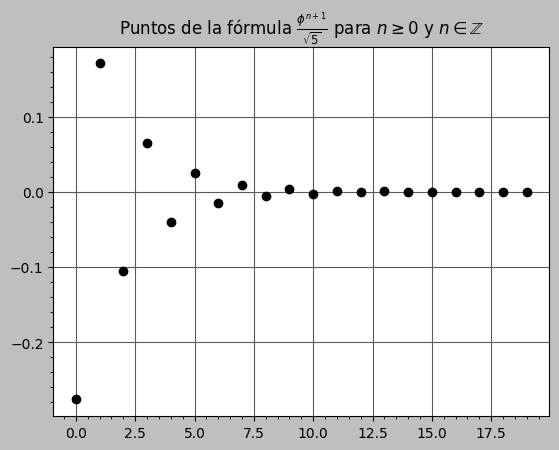

In [5]:
# Define n como un símbolo de Sympy
n = sp.symbols('n')
# Define b como Phi
b = (1 - sqrt(5))/2

# Calcula de n = 0 a 20 puntos y los introduce en una lísta
puntos = [(1/sqrt(5)) * (b**(k+1)) for k in range(0,20,1)]

# Muestra una gráfica con los puntos de n = 0 a 20
plt.style.use('grayscale')
plt.grid(which='major', color='#5a5a5a', linestyle='-')
#plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.title(r"Puntos de la fórmula $\frac{\phi^{n+1}}{\sqrt{5}}$ para $n \geq 0$ y $n \in \mathbb{Z}$", color="black")
plt.plot([i for i in range(0,20,1)],puntos,'o')

______________________________________________________

### - Corolario 4: $ -\frac{1}{2} < \frac{\phi^{n+1}}{\sqrt{5}} < \frac{1}{2}$ para todo $n \in \mathbb{Z} \geq 0$

Cuando $n = 0$, $-\frac{1}{2} < \frac{\phi}{\sqrt{5}} < \frac{1}{2}$. Por el Corolario 3 sabemos que cuando $n \to \infty$, $\displaystyle{\frac{\phi^{n+1}}{\sqrt{5}} \to 0}$. Por tanto decimos que $ -\frac{1}{2} < \frac{\phi^{n+1}}{\sqrt{5}} < \frac{1}{2}$ para todo $n \in \mathbb{Z} \geq 0$.
______________________________________________________

### - Teorema 4: Para $n \in \mathbb{Z} \geq 0$, $\ \ F_n = \lfloor \frac{\varphi^{n+1}}{\sqrt{5} } \rceil$

** Prueba **:

Sea la fórmula para la sucesión de Fibonacci

$\displaystyle{ F_n = \frac{\varphi^{n+1}}{\sqrt{5}} - \frac{\phi^{n+1}}{\sqrt{5}} }$

para todo $n \in \mathbb{Z} \geq 0$, dado que el resultado es siempre un número íntegro, podemos decir que

$\displaystyle{ F_n = \lfloor \frac{\varphi^{n+1}}{\sqrt{5}} - \frac{\phi^{n+1}}{\sqrt{5}} \rceil }$

Ya que el redondeo de un número íntegro es siempre el mísmo número íntegro.

La definición de la función de redondeo al entero más próximo establece que un número racional o irracional $x$ se redondea al entero más bajo si la parte decimal es inferior a $0.5$ (o $\frac{1}{2}$), y al entero más alto si es superior a $0.5$. En el caso de los medios números, se redondea al entero par más próximo. Por ejemplo, $1.5$ se redondea a $2$ ya que $2$ es el entero par más próximo, y $2.5$ se redondea a $2$ por el mísmo motivo.

Por otro lado, por el corolario 4 sabemos que $-\frac{1}{2} < \frac{\phi^{n+1}}{\sqrt{5}} < \frac{1}{2}$, por lo que al redondear ésta parte queda siempre a 0. Y por el corolario 3 sabemos que $\frac{\phi^{n+1}}{\sqrt{5}} \to 0$ cuando $n \to \infty$. Por éstos motivos, podemos ignorar la resta y quedarnos sólo con la parte positiva, ya que para los primeros valores de $n$ el valor de $\frac{\phi^{n+1}}{\sqrt{5}}$ se redondea a $0$, y según $n$ tiende a infinito, los valores son prácticamente despreciables.

Por tanto,

$\displaystyle{F_n = \lfloor \frac{\varphi^{n+1}}{\sqrt{5} } \rceil}$

In [6]:
def fib2(n):
    return (a**(n+1))/sqrt(5)

fibs = []
for n in range(0,12):
    fibs.append(int(round(fib2(n),0)))
    
display(fibs)

### Gráfica de $\displaystyle{\frac{\varphi^{n+1}}{\sqrt{5}}}$ para $n \geq 0$ y $n \in \mathbb{Z}$

Los puntos de los distintos valores tienden a infinito cuando n tiende a infinito.

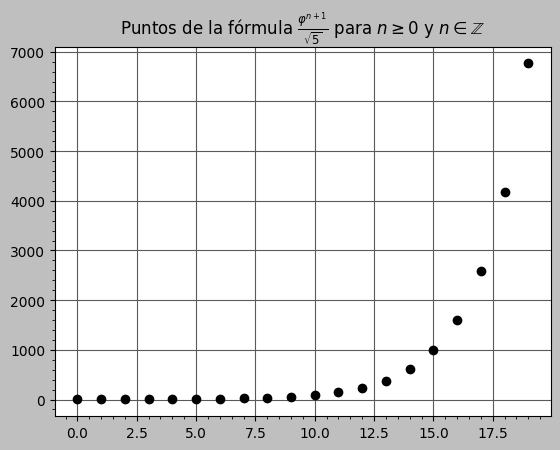

In [7]:
n = sp.symbols('n')
b = (1 + sqrt(5))/2
puntos = [(1/sqrt(5)) * (b**(k+1)) for k in range(0,20,1)]

plt.style.use('grayscale')
plt.grid(which='major', color='#5a5a5a', linestyle='-')
#plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.title(r"Puntos de la fórmula $\frac{\varphi^{n+1}}{\sqrt{5}}$ para $n \geq 0$ y $n \in \mathbb{Z}$", color="black")
plt.plot([i for i in range(0,20,1)],puntos,'o')

# La sucesión de Fibonacci como transformación lineal

La sucesión de Fibonacci se puede exptresar como una transformación lineal $T: F \to F$ a partir del siguiente sistema lineal de ecuaciones:

$ \displaystyle{\begin{cases}
f_{n-1} + f_n=f_{n+1}\\
f_n = f_n
\end{cases}} $

El sistema se representa como

$\displaystyle{T\left(\begin{bmatrix} F_{n-1} \\ F_{n-2} \end{bmatrix}\right) = \begin{bmatrix} 1 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} F_{n-1} \\ F_{n - 2} \end{bmatrix} = \begin{bmatrix} F_{n-1} + F_{n-2} \\ F_{n-1} \end{bmatrix} = \begin{bmatrix} F_n \\ F_{n-1} \end{bmatrix} }$

Los eigenvalores de la transformación son los siguientes:

$\displaystyle{Ax = \lambda x}$

$\displaystyle{Ax - \lambda x= 0}$

$\displaystyle{x(A - \lambda I_2)= 0}$

La ecuación tiene una solución cuando la determinante de la matriz $A - \lambda I_2$ es igual a cero.

$\displaystyle{A- \lambda I_2 = \begin{bmatrix} 1 - \lambda & 1 \\ 1 & -\lambda \end{bmatrix}}$

Por tanto, los eigenvalores se obtienen al computar la determinante de $A- \lambda I_2$:

$\displaystyle{det(A- \lambda I_2) = \lambda^2 - \lambda - 1}$

Que coincide con la relación de recurrencia $t^2 -t - 1$, por lo que los eigenvalores se corresponden con el ratio áureo.

$\displaystyle{\lambda = \{ \frac{1+\sqrt{5}}{2}, \frac{1-\sqrt{5}}{2}\} = \{ \varphi, \phi \}}$

Y los eigenvectores se corresponden con los vectores

$\displaystyle{\begin{bmatrix} \varphi \\ 1 \end{bmatrix}}$ y $\displaystyle{\begin{bmatrix} \phi \\ 1 \end{bmatrix}}$

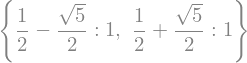

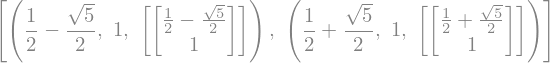

In [8]:
# Crear la matriz de transformación A
A = sp.Matrix(([1,1],[1,0]))
# Se importa lambda como un símbolo de Sympy
lambda_ = sp.symbols('lambda')
# Computar la determinante de A - λI(2)
display((A - lambda_ * sp.eye(2)).det())
# Calcular los eigenvalores de la transformación
display(A.eigenvals())
# Calcular los eigenvectores de la transformación
display(A.eigenvects())

# Computo de la sucesión por iteración

Dado que la sucesión es recursiva, el computo de cada término de Fibonacci se puede realizar de forma recursiva, de la siguiente manera:

In [9]:
# Algoritmo de Fibonacci 3: Computo mediante función recursiva
def fib3(n):
    if n < 0:
        return None # No definida para n < 0
    if n < 2 and n >= 0: # Si n = 0 o n = 1, Fn = 1
        return 1
    return fib3(n-1) + fib3(n-2) # Fn = Fn-1 + Fn-2

fibs = [fib3(n) for n in range(0,12,1)]
display(fibs)

El tiempo de cómputo es $O(2^n)$, ya que se realizan aproximadamente $2^n$ llamadas recursivas a la función (menos las llamadas con n = 0 o n = 1, que se resuelven en tiempo lineal).

Se puede reducir el tiempo haciendo que el cómputo se realice mediante bucles:

In [10]:
# Algoritmo de Fibonacci 4: Computo mediante iteración
def fib4(n):
    if n < 0:
        return None # No definida para n < 0
    if n < 2 and n >= 0: # Si n = 0 o n = 1, Fn = 1
        return 1
    f0 = 1
    f1 = 1
    fn = 0
    for i in range(2,n+1,1): # Fn = Fn-1 + Fn-2
        fn = f1 + f0 # Se calcula Fn-1 + Fn-2
        f0 = f1 # Fn-2 = Fn-1
        f1 = fn # Fn-1 = Fn
    return fn # Se retorna el resultado

fibs = [fib4(n) for n in range(0,12,1)]
display(fibs)

El tiempo de cómputo es ahora $O(n)$ (lineal), ya que se realizan n-2 iteraciones. Por tanto éste algoritmo es mucho más eficiente y rápido que el anterior.

Sin embargo, la forma más eficiente de realizar el cómputo, asumiendo que se ejecute en hardware moderno con optimizaciones para el cómputo de operaciones de punto flotante, es usando las fórmulas de recursión mencionadas antes.

In [11]:
# 1/sqrt(5)
msqrt = 1/sqrt(5)
a = (1 + sqrt(5))/2
b = (1 - sqrt(5))/2
# Algoritmo de Fibonacci 1: Computo mediante la relación de sucesión
def fib1(n):
    return msqrt * (a**(n+1) - b**(n+1))

fibs = [int(fib1(n)) for n in range(0,12,1)]
    
# Muestra los términos calculados
display(fibs)

Y en especial, la forma optimizada

In [12]:
# Algoritmo de Fibonacci 2: Computo mediante la relación de sucesión optimizada
def fib2(n):
    return (a**(n+1))/sqrt(5)

fibs = [int(round(fib2(n),0)) for n in range(0,12,1)]
    
display(fibs)

Con las optimizaciones aplicadas mediante hardware, estos algoritmos se ejecutan en tiempo $O(1)$. Es decir, *tarda lo mísmo independientemente del valor de n*. No obstante, sin dichas optimizaciones, es probable que no sea el caso y puede que el algoritmo 4 sea el más eficiente para estos casos.